# Лабораторная работа №2: Моделирование и анализ линейных комбинаций дискретных сигналов

Выполнили студенты гр. 2384 Исмаилов Максим Владимирович и Дамакин Роман Павлович. Вариант №15.

## Цель работы

Изучить математическое описание линейных комбинаций дискретных гармонических сигналов и овладеть программными средствами их моделирования.

## Основные теоретические положения

Дискретный единичный скачок:

$$
\sigma_d(k) =
\begin{cases}
1, & k \geq 0, \\[6pt]
0, & k < 0,
\end{cases}
\quad k \in \mathbb{Z}
$$

Это дискретная функция, равная нулю до момента $k=0$, и единице начиная с этого момента.

Дискретный прямоугольный имульс:

$$
s_1(k) =
\begin{cases}
U, & n_0 \le k \le n_0 + n_{imp} - 1; \\
0, & \text{иначе.}
\end{cases}
$$

Линейная комбинация дискретных гармонических сигналов $s_2(k)$
$$s_2(k) = a_1x_1(k) + a_2x_2(k) + a_3x_3(k),$$ где $$x_i(k) = B_isin(\hat{\omega}_i k), i=1,2,3$$

Дискретный сигнал $s_3(k)$ представляющий собой дискретный гармонический сигнал $s(k)$

$$ s(k)=Ccos(\hat{\omega}_0 k) $$

Дискретная периодическая последовательность $s_4(k)$ с периодом $T$ может быть построена на основе функции $s_p(k)$, описывающей один полный период сигнала (в диапазоне $k \in [0, T - 1]$).  
Для повторения этого периода по всей временной оси используется операция взятия остатка от деления индекса $k$ на период $T$:

$$
s_4(k) = s_p(k \bmod T)
$$


## Постановка задачи
С помощью программных средств провести моделирование и анализ линейных комбинацций дискретных гармонических последовательностей. Результаты подкрепить соответствующими графиками и выводами.



## Выполнение работы

In [51]:
import numpy as np
import numpy as np
import matplotlib.pyplot as plt

In [52]:
Nb = 15

N = 30 + Nb % 5
a = (-1)**Nb * (0.8 + 0.005 * (Nb % 20))
C = 1 + Nb % 5
w0 = np.pi / (6 + Nb % 5)

U = (Nb % 20) + 1
n0 = 3 + Nb % 5
n_imp = 5 + Nb % 5

B1 = 1.5 + Nb % 5
B2 = 5.7 - Nb % 5
B3 = 2.2 + Nb % 5

w1 = np.pi / (4 + Nb % 5)
w2 = np.pi / (8 + Nb % 5)
w3 = np.pi / (16 + Nb % 5)

a1 = 1.5 - Nb % 5
a2 = 0.7 + Nb % 5
a3 = 1.4 + Nb % 5

print(f"Номер бригады: {Nb}")
print(f"Длина последовательности: {N}")
print(f"Основание экспоненты: {a}")
print(f"Амплитуда гармонического сигнала: {C}")
print(f"Частота гармонического сигнала (ω0^): {w0}")
print(f"Амплитуда импульса U: {U}")
print(f"Начальный момент импульса n0: {n0}")
print(f"Длина импульса m (n_imp): {n_imp}")
print(f"Амплитуды гармоник: B1={B1}, B2={B2}, B3={B3}")
print(f"Частоты гармоник: ω1^={w1}, ω2^={w2}, ω3^={w3}")
print(f"Коэф. линейной комбинации: a1={a1}, a2={a2}, a3={a3}")


Номер бригады: 15
Длина последовательности: 30
Основание экспоненты: -0.875
Амплитуда гармонического сигнала: 1
Частота гармонического сигнала (ω0^): 0.5235987755982988
Амплитуда импульса U: 16
Начальный момент импульса n0: 3
Длина импульса m (n_imp): 5
Амплитуды гармоник: B1=1.5, B2=5.7, B3=2.2
Частоты гармоник: ω1^=0.7853981633974483, ω2^=0.39269908169872414, ω3^=0.19634954084936207
Коэф. линейной комбинации: a1=1.5, a2=0.7, a3=1.4


In [53]:
# Дискретный единичный скачок:

def sigma_d(k):
  return 1 if k >= 0 else 0

# Дискретный прямоугольный импульс:

def s1(k):
  return U * (sigma_d(k-n0) - sigma_d(k-(n0 + n_imp)))

# Гармонические сигналы:

def x1(k):
  return B1 * np.sin(w1*k)

def x2(k):
  return B2 * np.sin(w2*k)

def x3(k):
  return B3 * np.sin(w3*k)


# Линейная комбинация дискретных гармонических сигналов:
def s2(k):
  return a1*x1(k) + a2*x2(k) + a3*x3(k)

# Экспоненциальная огибающая:
def s3_wrap(k):
  return np.abs(a)**k

# Дискретный гармонический сигнал s3 с экспоненциальной огибающей:
def s3(k):
  return C*np.cos(w0*k)*s3_wrap(k)

# Периодическая последовательность s4:

def s4(k):
  return s1(k%T)

# Период последовательности s4
T = 2 * n_imp

# Точки интервала дискретного нормированного времени
Xn = np.array([i for i in range(N)])

# Точки [0; 5N - 1]
Xn5 = np.array([i for i in range(N * 5)])

# Точки 5-ти периодов последовательности s4
Xs4 = np.array([i for i in range(T * 5)])

# Значения сигналов
s1_Y = np.array([s1(k) for k in Xn])

x1_Y = np.array([x1(k) for k in Xn5])
x2_Y = np.array([x2(k) for k in Xn5])
x3_Y = np.array([x3(k) for k in Xn5])

s2_Y = np.array([s2(k) for k in Xn5])
s3_Y = np.array([s3(k) for k in Xn])
s3_wrap_Y = np.array([s3_wrap(k) for k in Xn])
s4_Y = np.array([s4(k) for k in Xs4])



### **1.**
Смоделировать дискретный прямоугольный импульс:

$$
s_1(k)=
\begin{cases}
U, & n_0 \le k \le n_0 + n_{\text{imp}} - 1,\\
0, & \text{иначе.}
\end{cases}
$$


на основе дискретного единичного скачка $σ_d(k)$ из л/р №1 с выводом графика на интервале времени n∈[0,N−1]. Пояснить как выполняется моделирование импульса.

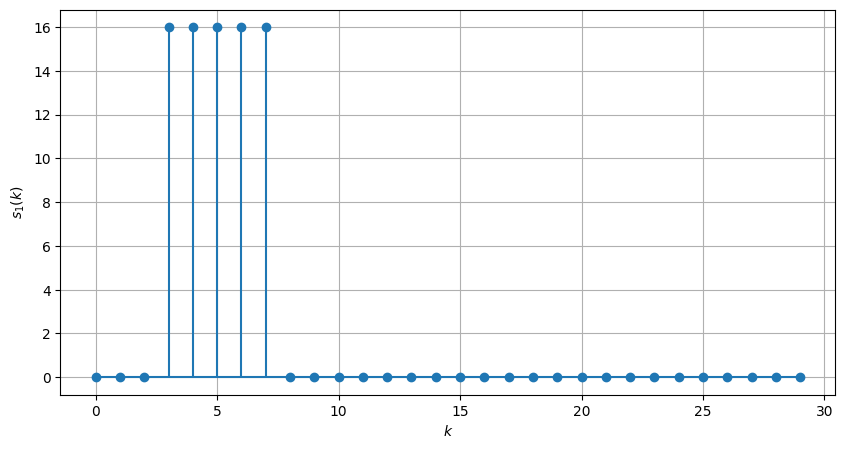

In [54]:

# График дискретного прямоугольного импульса
plt.figure(figsize=(10,5))
plt.stem(Xn, s1_Y, basefmt="", markerfmt="o")
plt.ylabel('$s_1(k)$')
plt.xlabel('$k$')
plt.grid(True)
plt.show()

**Пояснения:**

Данный сигнал был смоделирован путём вычитания двух единичных скачков с разными задержкам:

$$s_1(k)=U*(σ_d(k-n_0)-σ_d(k-(n_0+n_imp)))$$


### **2.**
Смоделировать линейную комбинацию дискретных гармонических сигналов $s_2(k)$

$$s_2(k)=a_1x_1(k)+a_2x_2(k)+a_3x_3(k)$$

где

$$x_i(k)=B_isin(\hat{\omega}_ik), i = 1,2,3,$$

с выводом графиков последовательностей $x_i(k)$ и $s_2(k)$ на интервале времени $n∈[0,5N−1]$.
$$$$
Вычислить среднее значение (идентификатор mean_s2), энергию (идентификатор E) и среднюю мощность последовательности $s_2(k)$ (идентификатор P). Пояснить:
$$$$
a. Операции при моделировании линейной комбинации сигналов $s_2(k)$.
$$$$
b. Как определяют указанные характеристики.

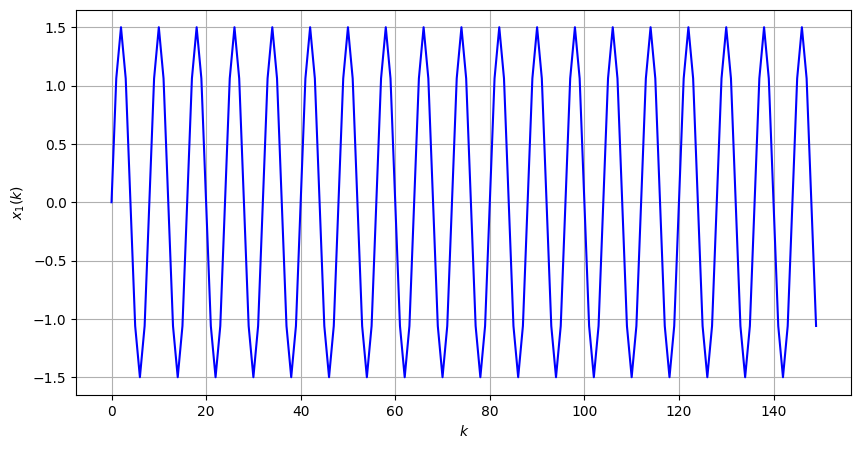

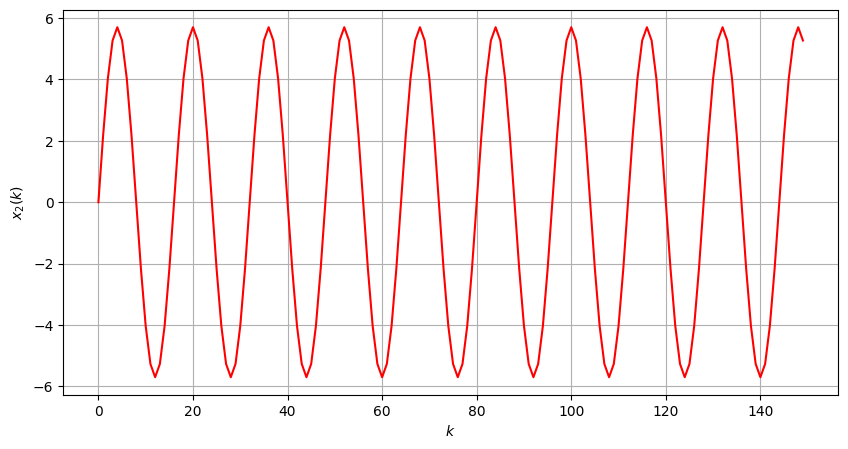

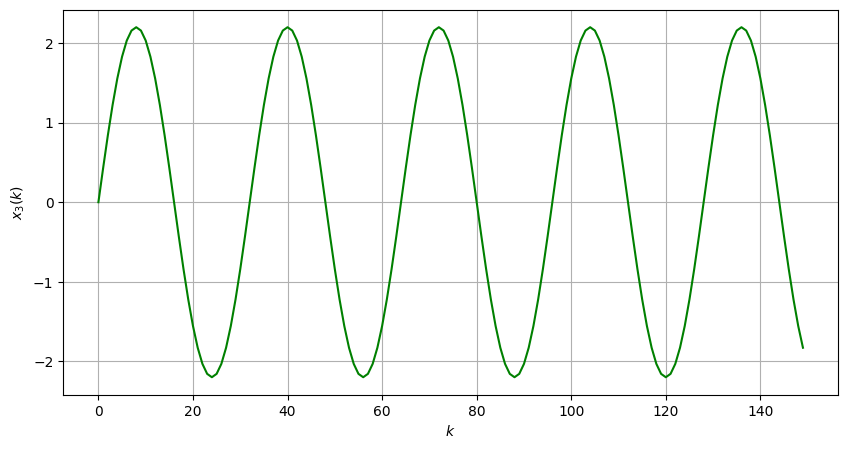

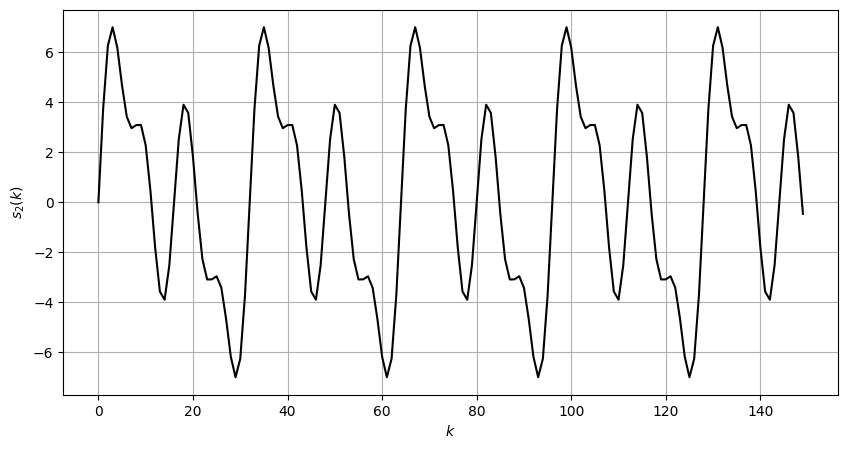

mean_s2 = 0.2840 
E = 2231.4742 
P = 14.8765


In [55]:
# График 1-го гармонического сигнала
plt.figure(figsize=(10,5))
plt.plot(Xn5, x1_Y, color='blue', label='$x_1(k)$')
plt.ylabel('$x_1(k)$')
plt.xlabel('$k$')
plt.grid(True)

# График 2-го гармонического сигнала
plt.figure(figsize=(10,5))
plt.plot(Xn5, x2_Y, color='red', label='$x_2(k)$')
plt.ylabel('$x_2(k)$')
plt.xlabel('$k$')
plt.grid(True)

# График 3-го гармонического сигнала
plt.figure(figsize=(10,5))
plt.plot(Xn5, x3_Y, color='green', label='$x_3(k)$')
plt.ylabel('$x_3(k)$')
plt.xlabel('$k$')
plt.grid(True)


# График линейной комбинации сигналов
plt.figure(figsize=(10,5))
plt.plot(Xn5, s2_Y, color='black', label='$s_2(k)$')
plt.ylabel('$s_2(k)$')
plt.xlabel('$k$')
plt.grid(True)

plt.show()


# Среднее значение
mean_s2 = np.mean(s2_Y)
# Энергия
E = sum([s ** 2 for s in s2_Y])
# Мощность
P = E / len(s2_Y)
print(f'mean_s2 = {mean_s2:.4f} \nE = {E:.4f} \nP = {P:.4f}')

**Пояснения:**

*Моделирование линейной комбинации сигналов*

Линейная комбинация гармонических сигналов задаётся выражением:

$$
s_2(k) = a_1x_1(k) + a_2x_2(k) + a_3x_3(k),
$$

где каждый гармонический сигнал определяется формулой:

$$
x_i(k) = B_i \sin(\hat{\omega}_i k), \quad i = 1, 2, 3.
$$

Каждый сигнал $x_i(k)$ имеет собственную амплитуду $B_i$ и частоту $\hat{\omega}_i$.  
Коэффициенты $a_i$ задают вес каждого из сигналов в результирующую комбинацию $s_2(k)$.


*Определение характеристик сигнала*

После моделирования вычисляются основные характеристики последовательности $s_2(k)$:

1. Среднее значение (mean_s2) — показывает постоянную составляющую сигнала:
$$
mean_{s_2} = \frac{1}{N} \sum_{k=0}^{N-1} s_2(k).
$$

2. **Энергия сигнала (E)** — характеризует суммарную энергию последовательности:
$$
E = \sum_{k=0}^{N-1} [s_2(k)]^2.
$$

3. **Средняя мощность (P)** — отражает среднюю энергию сигнала на один отсчёт:
$$
P = \frac{E}{N}.
$$

### **3.**
Вывести график дискретного сигнала $s_3(k)$ представляющего собой дискретный гармонический сигнал $s(k)$

$$s(k)=Ccos(\hat{\omega}_0k)$$

с экспоненциальной огибающей $|a|^k$, на интервале времени $n∈[0,N−1]$.
Привести аналитическую формулу дискретного сигнала $s_3(k)$ и пояснить операции при его моделировании.

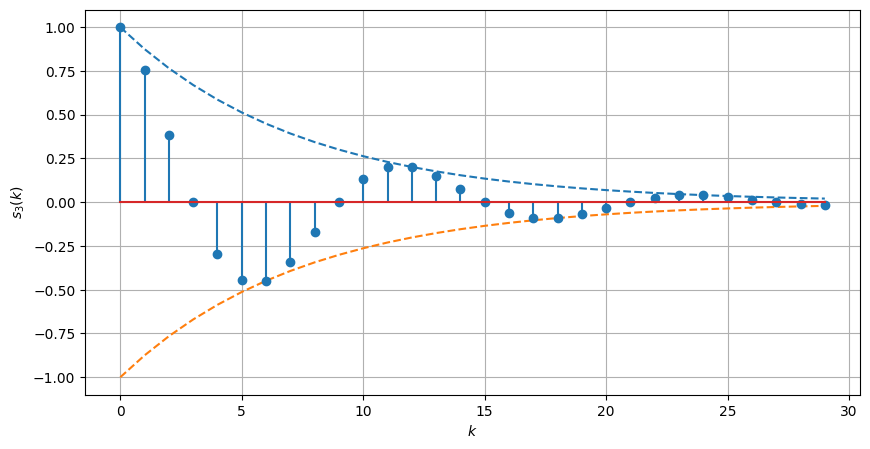

In [56]:
# График гармонического сигнала с экспоненциальной огибающей
plt.figure(figsize=(10,5))
plt.plot(Xn, s3_wrap_Y, "--")
plt.plot(Xn, -s3_wrap_Y, "--")
plt.stem(Xn, s3_Y)
plt.ylabel('$s_3(k)$')
plt.xlabel('$k$')
plt.grid(True)
plt.show()

**Пояснения:**

*Аналитическая формула*

Дискретный гармонический сигнал задаётся выражением:

$$
s(k) = C \cos(\hat{\omega}_0 k),
$$

где  
- $C$ — амплитуда гармонического сигнала,  
- $\hat{\omega}_0$ — дискретная круговая частота,  
- $k$ — номер отсчёта (дискретное время).

Амплитуда сигнала изменяется по формуле $|a|^k$.  

Аналитическая формула исходного сигнала имеет вид:

$$
s_3(k) = |a|^k \cdot C \cos(\hat{\omega}_0 k).
$$

*Операции при моделировании*

Для каждого значения $k$ вычисляется:
   - экспоненциальная огибающая $|a|^k$;
   - гармоническая составляющая $\cos(\hat{\omega}_0 k)$;
   - результирующее значение $s_3(k)$ по формуле:
$$
s_3(k) = |a|^k \cdot C \cos(\hat{\omega}_0 k).
$$


### **4.**
Вывести график пяти периодов периодической последовательности $s_4(k)$ дискретных прямоугольных импульсов амплитуды U и длительности $n_{imp}$ с периодом, вдое большим длительности импульса. Пояснить операции при моделировании периодической последовательности.

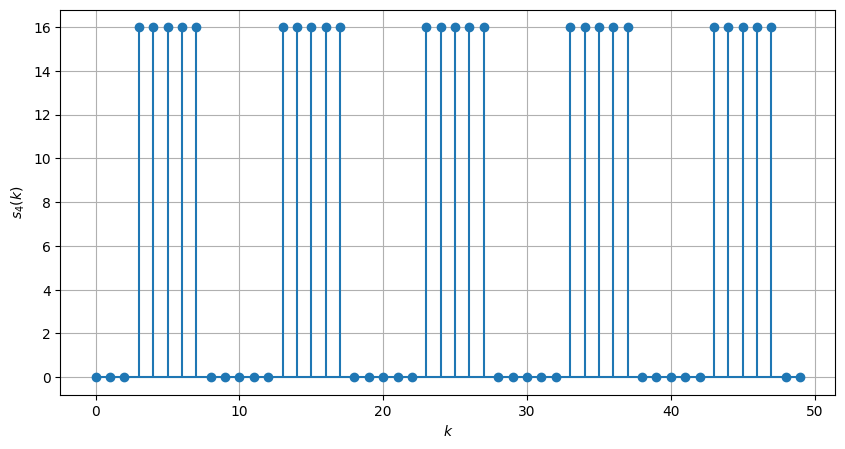

In [57]:
# График прямоугольного дискретного импульса на 5-ти периодах
plt.figure(figsize=(10,5))
plt.stem(Xs4, s4_Y, basefmt="", markerfmt="o")
plt.ylabel('$s_4(k)$')
plt.xlabel('$k$')
plt.grid(True)
plt.show()

**Пояснения:**

*Операции при моделировании*

Для каждого $k$ вычисляется значение $s_4(k)$:
   - если $(k \bmod T) < n_{imp}$, то $s_4(k) = U$;
   - иначе $s_4(k) = 0$.

На графике отображается периодическая прямоугольная последовательность, состоящая из пяти повторяющихся импульсов амплитуды $U$ и длительности $n_{imp}$.



## **Вывод**


В ходе лабораторной работы были исследованы и построены графики линейных комбинаций дискретных сигналов. Были смоделированы:

- прямоугольный сигнал $s_1(k)$
- линейная комбинация дискретных гармонических сигналов $s_2(k)$ — для него дополнительно вычислены среднее значение, энергия и средняя мощность
- дискретный гармонический сигнал $s_3(k)$ — для него отображена аналитическая формула
- периодическая последовательность $s_4(k)$ из прямоугольных импульсов

Для всех полученных сигналов построены соответствующие графики.